In [1]:
import pandas as pd
import numpy as np

filepath = 'https://raw.githubusercontent.com/PhimWi/Logistic-Regression-and-Analysis/main/%E0%B8%AA%E0%B8%B3%E0%B8%A3%E0%B8%A7%E0%B8%88%E0%B8%81%E0%B8%B2%E0%B8%A3%E0%B9%83%E0%B8%8A%E0%B9%89%20Smartphone%20(Responses).csv'
df = pd.read_csv(filepath)


In [2]:
df_encoded = pd.get_dummies(df, columns=['Gender','Age','Occupation','Salary','Gaming', 'Social_Media', 'Entertainment', 'Photo_Video'], dtype=int)
#create dummy variables

In [3]:
df_encoded.drop(columns=[ 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16'], inplace=True)

df_encoded.dropna(inplace=True)

In [4]:
!pip install scikit-learn pandas

In [5]:
!pip install shap --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 11.0 MB/s eta 0:00:00


In [6]:
import shap


In [7]:
df_encoded.columns
#checking all columns in dataframe

Index(['System', 'New_smartphone_choice', 'Reason', 'Gender_Female',
       'Gender_Male', 'Age_21-25 yrs', 'Age_26-30 yrs', 'Age_31-35 yrs',
       'Age_36-40 yrs', 'Occupation_Freelancer', 'Occupation_Gov_Off',
       'Occupation_Private_sector', 'Occupation_State_enterprise',
       'Occupation_Student', 'Occupation_unemployed',
       'Salary_20,001-30,000 Baht', 'Salary_30,001-40,000 Baht',
       'Salary_40,001-50,000 Baht', 'Salary_50,001-60,000 Baht',
       'Salary_less than 20,000 Baht', 'Salary_more  than 60,000 Baht',
       'Gaming_Least', 'Gaming_Moderate', 'Gaming_Most Often', 'Gaming_Often',
       'Gaming_Quite less', 'Social_Media_Least', 'Social_Media_Moderate',
       'Social_Media_Most Often', 'Social_Media_Often',
       'Social_Media_Quite less', 'Entertainment_Least',
       'Entertainment_Moderate', 'Entertainment_Most Often',
       'Entertainment_Often', 'Entertainment_Quite less', 'Photo_Video_Least',
       'Photo_Video_Moderate', 'Photo_Video_Most Often', 

In [8]:
feature_cols = ['Gender_Female',
       'Gender_Male', 'Age_21-25 yrs', 'Age_26-30 yrs', 'Age_31-35 yrs',
       'Age_36-40 yrs', 'Occupation_Freelancer', 'Occupation_Gov_Off',
       'Occupation_Private_sector', 'Occupation_State_enterprise',
       'Occupation_Student', 'Occupation_unemployed',
       'Salary_20,001-30,000 Baht', 'Salary_30,001-40,000 Baht',
       'Salary_40,001-50,000 Baht', 'Salary_50,001-60,000 Baht',   'Gaming_Least', 'Gaming_Moderate', 'Gaming_Most Often', 'Gaming_Often',
       'Gaming_Quite less', 'Social_Media_Least', 'Social_Media_Moderate',
       'Social_Media_Most Often', 'Social_Media_Often',
       'Social_Media_Quite less', 'Entertainment_Least',
       'Entertainment_Moderate', 'Entertainment_Most Often',
       'Entertainment_Often', 'Entertainment_Quite less', 'Photo_Video_Least',
       'Photo_Video_Moderate', 'Photo_Video_Most Often', 'Photo_Video_Often',
       'Photo_Video_Quite less']

X = df_encoded[feature_cols]
y = df_encoded['System']

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y = le.fit_transform(y)


from sklearn.model_selection import train_test_split
#test30%,train70%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [9]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

#print(y_pred)

In [10]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 0,  2],
       [ 2, 17]])

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.89      0.89      0.89        19

    accuracy                           0.81        21
   macro avg       0.45      0.45      0.45        21
weighted avg       0.81      0.81      0.81        21



In [12]:
import matplotlib.pyplot as plt

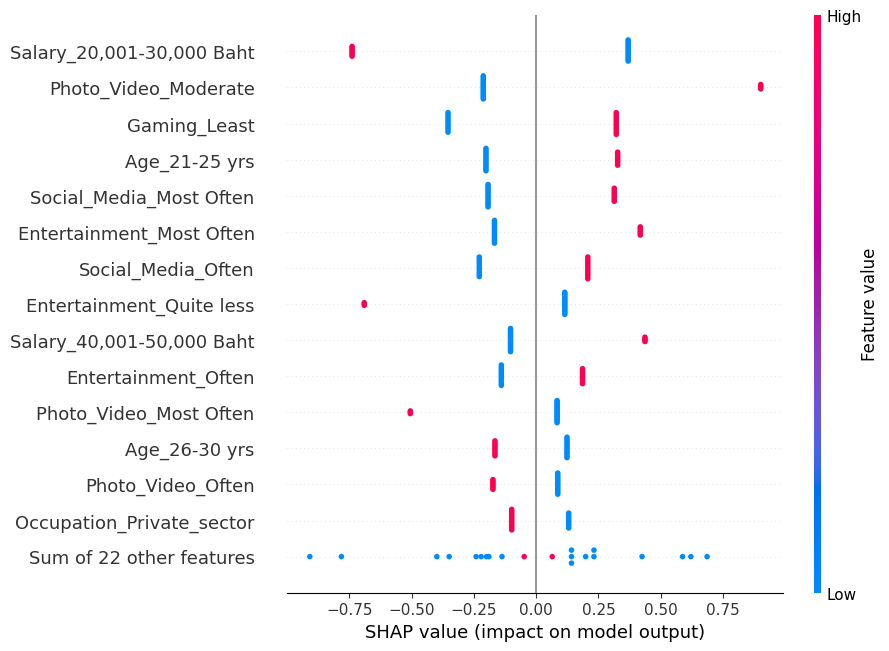

In [13]:
explainer = shap.Explainer(logreg, X_test)
shap_values = explainer(X_test)

#download javascript
shap.initjs()

#Beeswarm plot
shap.plots.beeswarm(shap_values, max_display=15)

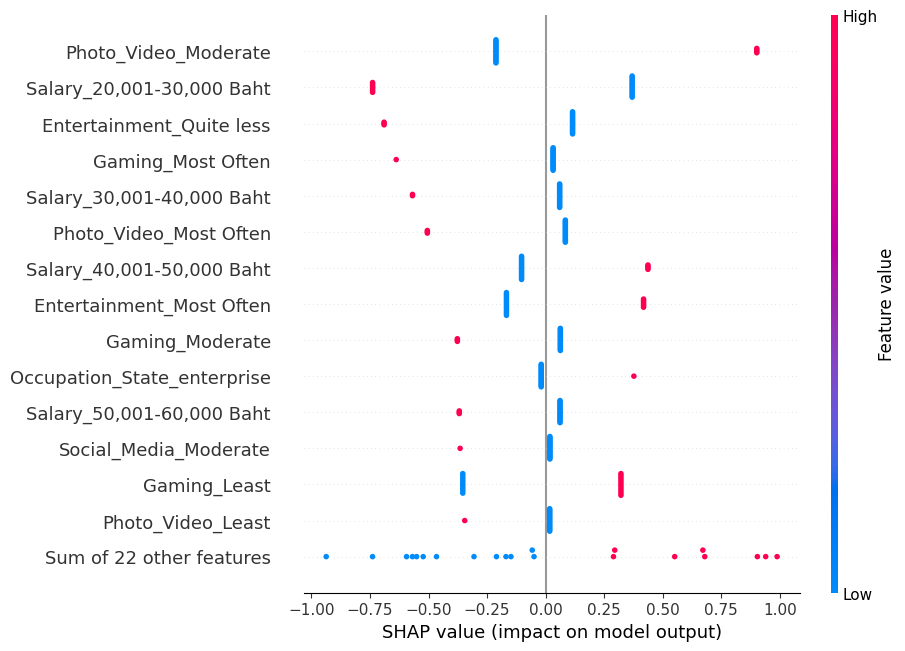

In [14]:
shap.plots.beeswarm(shap_values, order=shap_values.abs.max(0), max_display=15)

In [15]:
random_sample = df_encoded.sample(n=1, random_state=24)
random_sample

,System,New_smartphone_choice,Reason,Gender_Female,Gender_Male,Age_21-25 yrs,Age_26-30 yrs,Age_31-35 yrs,Age_36-40 yrs,Occupation_Freelancer,...,Entertainment_Least,Entertainment_Moderate,Entertainment_Most Often,Entertainment_Often,Entertainment_Quite less,Photo_Video_Least,Photo_Video_Moderate,Photo_Video_Most Often,Photo_Video_Often,Photo_Video_Quite less
49,IOS,Iphone,"ใช้งานง่าย, รวดเร็ว",1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [16]:
#df_encoded.sum()